# Importing libraries

In [180]:
#'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

#'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

#'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as py
init_notebook_mode(connected=True)
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['cm', 'f', 'plot']
`%matplotlib` prevents importing * from pylab and numpy



# Reading data

In [181]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Descriptive Analysis

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [183]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [184]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# Filling NaNs with the average value

In [185]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace = True)

In [186]:
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace = True)

In [187]:
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace = True)

In [188]:
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace = True)

In [189]:
df.drop(df[df['sex'] == '.'].index, inplace = True)

In [190]:
df['sex'].fillna(df['sex'].mode()[0],inplace = True)

In [191]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [192]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [199]:
labels = sorted(df.island.unique())
values = df.island.value_counts().sort_index()
colors = ['BlanchedAlmond', 'GreenYellow', 'PaleTurquoise']


fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(title_text="Distribution of Islands")
fig.show()


In [196]:
labels = sorted(df.species.unique())
values = df.species.value_counts().sort_index()
colors = ['Aquamarine', 'Yellow', 'Coral']


fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(title_text="Distribution of Species")
fig.show()

In [157]:
labels = sorted(df.sex.unique())
values = df.sex.value_counts().sort_index()
colors = ['Aqua', 'Chocolate']


fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(title_text="Distribution of Gender")
fig.show()

In [272]:
fig = px.violin(df, y="culmen_length_mm", x="sex", color="sex", box=True, points="all")
fig.update_layout(title="Interquartile distribution of culmen_length by Gender")
fig.show()

In [275]:
fig = px.violin(df, y="culmen_depth_mm", x="sex", color="sex", box=True, points="all")
fig.update_layout(title="Interquartile distribution of culmen_depth_mm by Gender")
fig.show()

In [276]:
fig = px.violin(df, y="flipper_length_mm", x="sex", color="sex", box=True, points="all")
fig.update_layout(title="Interquartile distribution of flipper_length by Gender")
fig.show()

In [277]:
fig = px.violin(df, y="body_mass_g", x="sex", color="sex", box=True, points="all")
fig.update_layout(title="Interquartile distribution of body_mass by Gender")
fig.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'culmen_length_mm'),
  Text(1, 0, 'culmen_depth_mm'),
  Text(2, 0, 'flipper_length_mm'),
  Text(3, 0, 'body_mass_g')])

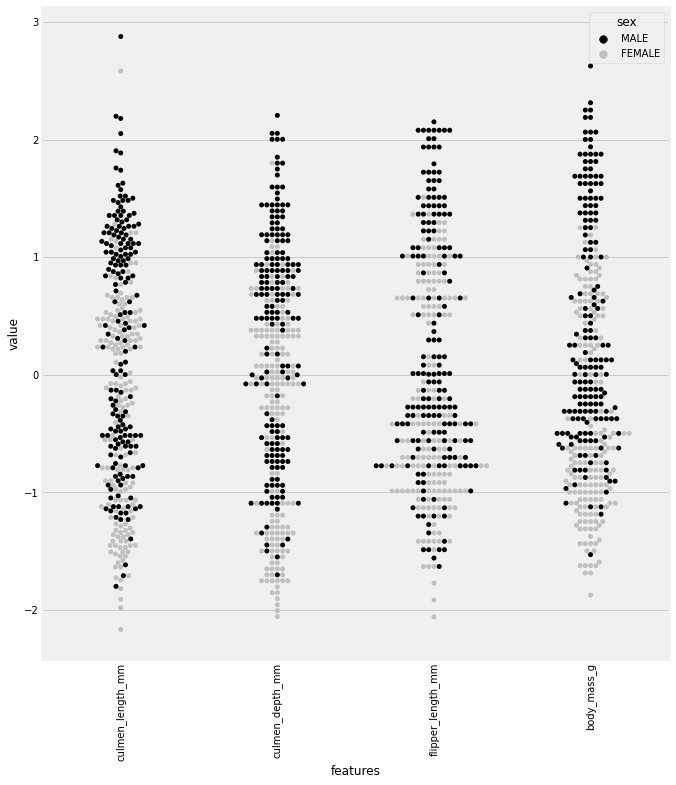

In [278]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="sex",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,12))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="sex", data=data,palette=["black", "silver"])

plt.xticks(rotation=90)

In [279]:
fig = px.scatter_matrix(df, dimensions=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"], color="species",height=700, width=800)
fig.show()

<AxesSubplot:>

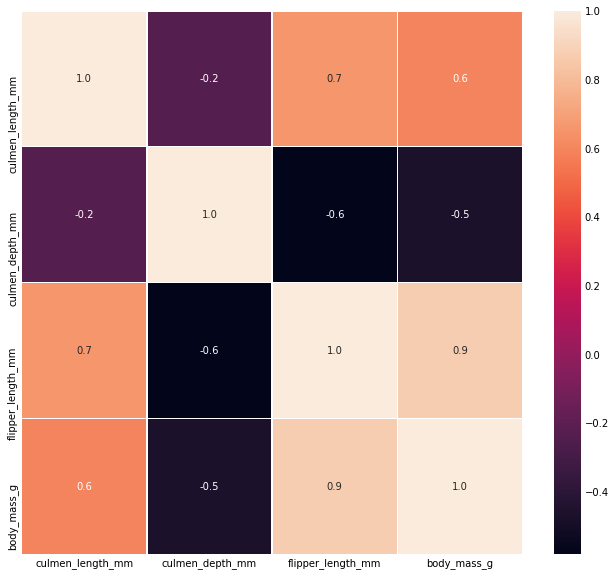

In [280]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature Selection and Random Forest Classification

In [158]:
y = df['sex']

In [159]:
x = df.drop(['species','island','sex'], axis = 1 )

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [165]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

Accuracy is:  0.8932038834951457


<AxesSubplot:>

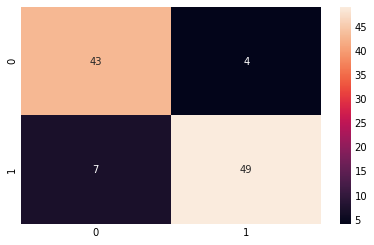

In [166]:
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

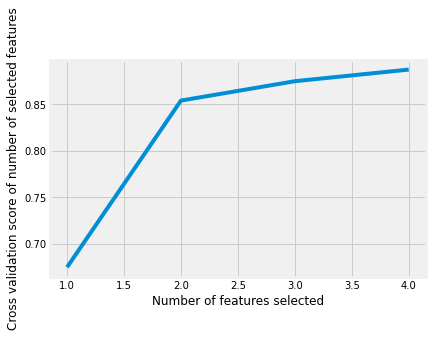

In [132]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# The model achieved an an accuracy of 89%